<a href="https://colab.research.google.com/github/INFINITY-RUBER/Machine_Learning_A-Z_Hands-On-Python-R-In-Data-Science/blob/master/Part%202%20-%20Regression/Section%207%20-%20Support%20Vector%20Regression%20(SVR)/Python/support_vector_regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Support Vector Regression (SVR)

## Importing the libraries

In [34]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Importing the dataset

In [35]:
dataset = pd.read_csv('Position_Salaries.csv')
X = dataset.iloc[:, 1:-1].values# toma la columna 2 menos la ultima
y = dataset.iloc[:, -1].values# toma la ultima columna

In [36]:
print(X)

[[ 1]
 [ 2]
 [ 3]
 [ 4]
 [ 5]
 [ 6]
 [ 7]
 [ 8]
 [ 9]
 [10]]


In [37]:
print(y)

[  45000   50000   60000   80000  110000  150000  200000  300000  500000
 1000000]


In [38]:
y = y.reshape(len(y),1)# lo pasamos a tamaño de una columna o (2D array)

In [39]:
print(y)

[[  45000]
 [  50000]
 [  60000]
 [  80000]
 [ 110000]
 [ 150000]
 [ 200000]
 [ 300000]
 [ 500000]
 [1000000]]


## Feature Scaling

In [40]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()# crea un objeto escalar estandaer 
sc_y = StandardScaler()
X = sc_X.fit_transform(X)# tranformar los datos a escalar estandar con respecto a X de  (-1.5 a + 1.5 )
y = sc_y.fit_transform(y)# tranformar los datos a escalar estandar con respecto a de (-1 a + 3 )

In [41]:
print(X)

[[-1.5666989 ]
 [-1.21854359]
 [-0.87038828]
 [-0.52223297]
 [-0.17407766]
 [ 0.17407766]
 [ 0.52223297]
 [ 0.87038828]
 [ 1.21854359]
 [ 1.5666989 ]]


In [42]:
print(y)

[[-0.72004253]
 [-0.70243757]
 [-0.66722767]
 [-0.59680786]
 [-0.49117815]
 [-0.35033854]
 [-0.17428902]
 [ 0.17781001]
 [ 0.88200808]
 [ 2.64250325]]


## Training the SVR model on the whole dataset

![](https://raw.githubusercontent.com/INFINITY-RUBER/Machine_Learning_A-Z_Hands-On-Python-R-In-Data-Science/master/Part%202%20-%20Regression/Section%207%20-%20Support%20Vector%20Regression%20(SVR)/Python//karnel.png?raw=1)



In [43]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf') # 'rbf'>> karnel gaussiano de RBF
regressor.fit(X, y)

/usr/local/lib/python3.6/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

## Predicting a new result
Predecir un nuevo resultado

In [44]:
sc_y.inverse_transform(regressor.predict(sc_X.transform([[6.5]])))
#sc_y.inverse_transform >>  transforamcion inversa de objeto escalar estandar 

array([170370.0204065])

## Visualising the SVR results
Visualizando los resultados SVR

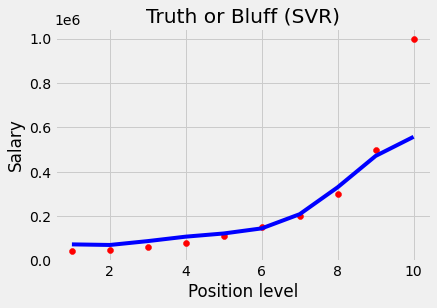

In [46]:
plt.style.use('fivethirtyeight')
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(sc_X.inverse_transform(X), sc_y.inverse_transform(regressor.predict(X)), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()

## Visualising the SVR results (for higher resolution and smoother curve)
Visualización de los resultados SVR (para una resolución más alta y una curva más suave)

In [47]:
np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)

array([1. , 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. , 2.1, 2.2,
       2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3. , 3.1, 3.2, 3.3, 3.4, 3.5,
       3.6, 3.7, 3.8, 3.9, 4. , 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8,
       4.9, 5. , 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6. , 6.1,
       6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7. , 7.1, 7.2, 7.3, 7.4,
       7.5, 7.6, 7.7, 7.8, 7.9, 8. , 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7,
       8.8, 8.9, 9. , 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9])

In [ ]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
X_grid

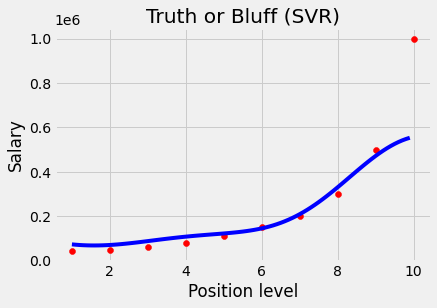

In [50]:
X_grid = np.arange(min(sc_X.inverse_transform(X)), max(sc_X.inverse_transform(X)), 0.1)
X_grid = X_grid.reshape((len(X_grid), 1))
plt.scatter(sc_X.inverse_transform(X), sc_y.inverse_transform(y), color = 'red')
plt.plot(X_grid, sc_y.inverse_transform(regressor.predict(sc_X.transform(X_grid))), color = 'blue')
plt.title('Truth or Bluff (SVR)')
plt.xlabel('Position level')
plt.ylabel('Salary')
plt.show()